In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = {
    "revenue": [50, 70, 32, 120, 15, 88, 63, 45, 200, 22],
    "profit_margin": [12, 20, 8, 15, 5, 17, 14, 10, 30, 6],
    "employees": [5, 12, 3, 40, 2, 25, 10, 5, 120, 4],
    "age": [3, 5, 1, 10, 0.5, 7, 4, 2, 20, 1],
    "existing_loans": [1, 0, 1, 0, 2, 0, 1, 1, 0, 2],
    "credit_score": [650, 720, 580, 800, 510, 760, 690, 620, 830, 540],
    "label": [1, 1, 0, 1, 0, 1, 1, 0, 1, 0]   # 1 = Approve, 0 = Reject
}
df = pd.DataFrame(data)
df


,revenue,profit_margin,employees,age,existing_loans,credit_score,label
0,50,12,5,3.0,1,650,1
1,70,20,12,5.0,0,720,1
2,32,8,3,1.0,1,580,0
3,120,15,40,10.0,0,800,1
4,15,5,2,0.5,2,510,0
5,88,17,25,7.0,0,760,1
6,63,14,10,4.0,1,690,1
7,45,10,5,2.0,1,620,0
8,200,30,120,20.0,0,830,1
9,22,6,4,1.0,2,540,0


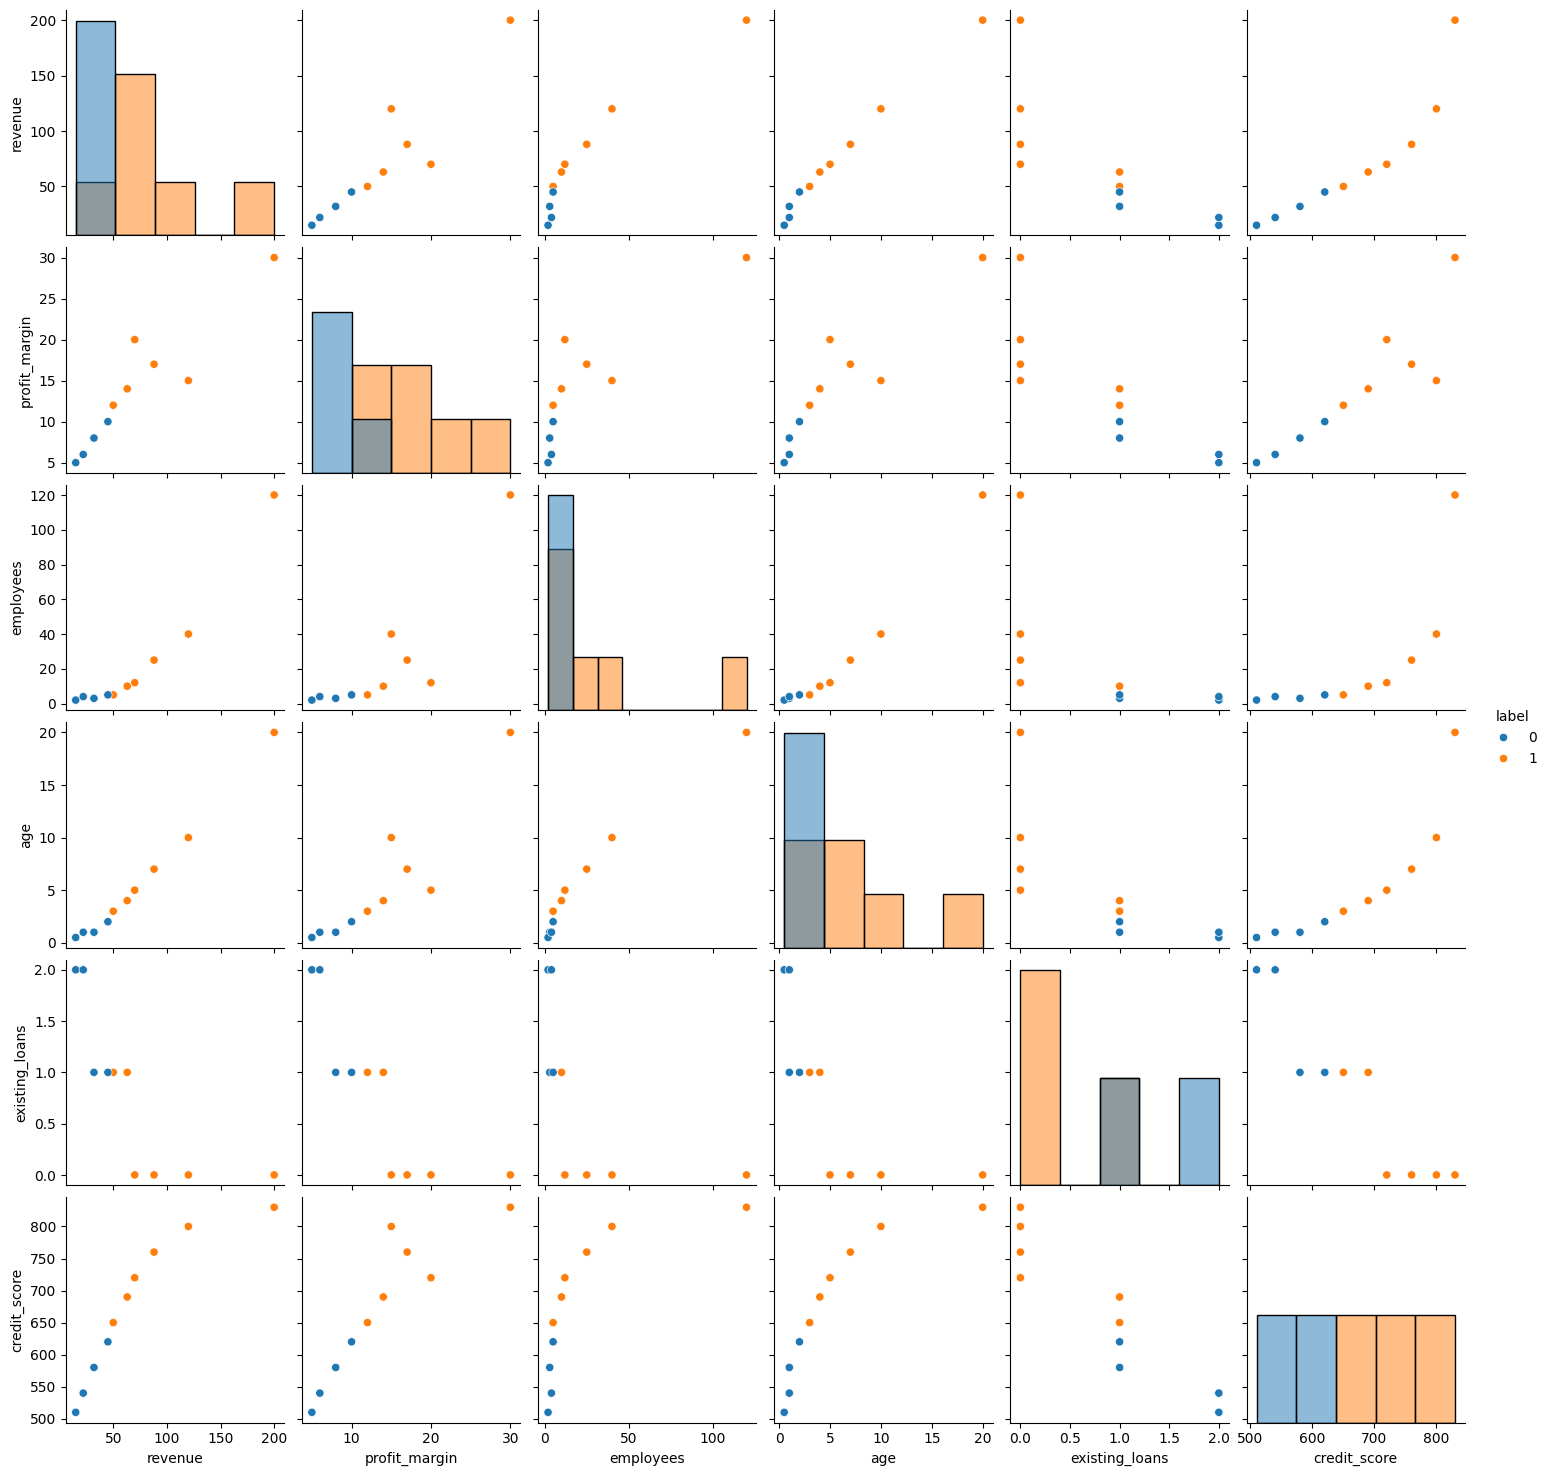

In [ ]:
sns.pairplot(df, hue="label",diag_kind="hist")
plt.show()

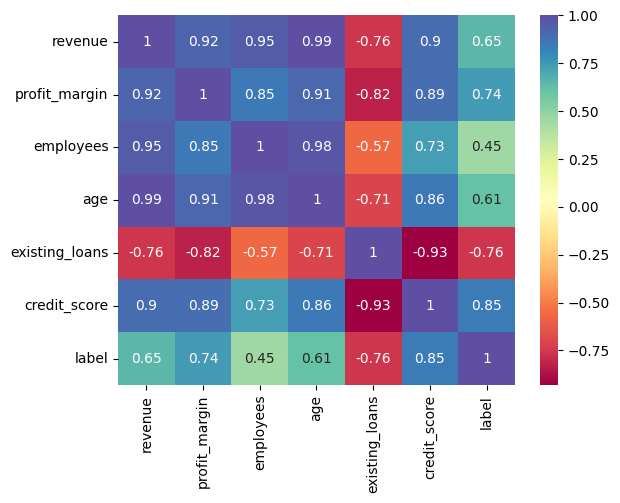

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="Spectral")
plt.show()

In [ ]:
X = df.drop("label", axis=1).values
y = df["label"].values.reshape(-1, 1)

In [ ]:
X

array([[5.0e+01, 1.2e+01, 5.0e+00, 3.0e+00, 1.0e+00, 6.5e+02],
       [7.0e+01, 2.0e+01, 1.2e+01, 5.0e+00, 0.0e+00, 7.2e+02],
       [3.2e+01, 8.0e+00, 3.0e+00, 1.0e+00, 1.0e+00, 5.8e+02],
       [1.2e+02, 1.5e+01, 4.0e+01, 1.0e+01, 0.0e+00, 8.0e+02],
       [1.5e+01, 5.0e+00, 2.0e+00, 5.0e-01, 2.0e+00, 5.1e+02],
       [8.8e+01, 1.7e+01, 2.5e+01, 7.0e+00, 0.0e+00, 7.6e+02],
       [6.3e+01, 1.4e+01, 1.0e+01, 4.0e+00, 1.0e+00, 6.9e+02],
       [4.5e+01, 1.0e+01, 5.0e+00, 2.0e+00, 1.0e+00, 6.2e+02],
       [2.0e+02, 3.0e+01, 1.2e+02, 2.0e+01, 0.0e+00, 8.3e+02],
       [2.2e+01, 6.0e+00, 4.0e+00, 1.0e+00, 2.0e+00, 5.4e+02]])

In [ ]:
y

array([[1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0]])

In [ ]:
X = (X - X.mean(axis=0)) / X.std(axis=0)
X

array([[-0.3904337 , -0.23991302, -0.51148097, -0.41605956,  0.26726124,
        -0.1933473 ],
       [-0.00952277,  0.88908941, -0.30805104, -0.06196632, -1.06904497,
         0.48336824],
       [-0.73325353, -0.80441423, -0.56960381, -0.7701528 ,  0.26726124,
        -0.87006284],
       [ 0.94275454,  0.18346289,  0.50566869,  0.82326679, -1.06904497,
         1.25675744],
       [-1.05702781, -1.22779014, -0.59866523, -0.85867611,  1.60356745,
        -1.54677838],
       [ 0.33329706,  0.4657135 ,  0.06974741,  0.29212692, -1.06904497,
         0.87006284],
       [-0.1428416 ,  0.04233759, -0.36617388, -0.23901294,  0.26726124,
         0.1933473 ],
       [-0.48566143, -0.52216362, -0.51148097, -0.59310618,  0.26726124,
        -0.48336824],
       [ 2.46639823,  2.30034245,  2.83058219,  2.59373299, -1.06904497,
         1.54677838],
       [-0.92370899, -1.08666484, -0.54054239, -0.7701528 ,  1.60356745,
        -1.25675744]])

In [ ]:
X = np.hstack((np.ones((X.shape[0], 1)), X))  # shape: (n_samples, 1 + n_features)

In [ ]:
X

array([[ 1.        , -0.3904337 , -0.23991302, -0.51148097, -0.41605956,
         0.26726124, -0.1933473 ],
       [ 1.        , -0.00952277,  0.88908941, -0.30805104, -0.06196632,
        -1.06904497,  0.48336824],
       [ 1.        , -0.73325353, -0.80441423, -0.56960381, -0.7701528 ,
         0.26726124, -0.87006284],
       [ 1.        ,  0.94275454,  0.18346289,  0.50566869,  0.82326679,
        -1.06904497,  1.25675744],
       [ 1.        , -1.05702781, -1.22779014, -0.59866523, -0.85867611,
         1.60356745, -1.54677838],
       [ 1.        ,  0.33329706,  0.4657135 ,  0.06974741,  0.29212692,
        -1.06904497,  0.87006284],
       [ 1.        , -0.1428416 ,  0.04233759, -0.36617388, -0.23901294,
         0.26726124,  0.1933473 ],
       [ 1.        , -0.48566143, -0.52216362, -0.51148097, -0.59310618,
         0.26726124, -0.48336824],
       [ 1.        ,  2.46639823,  2.30034245,  2.83058219,  2.59373299,
        -1.06904497,  1.54677838],
       [ 1.        , -0.9237

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, weights):
    return sigmoid(np.dot(X, weights))

def compute_loss(X, y, weights):
    m = len(y)
    predictions = predict(X, weights)
    loss = - (1/m) * np.sum(y*np.log(predictions) + (1-y)*np.log(1 - predictions))
    return loss

In [ ]:
def train_logistic_regression(X, y, lr=0.1, epochs=2000):
    np.random.seed(42)
    weights = np.random.randn(X.shape[1], 1) * 0.01

    for i in range(epochs):
        predictions = predict(X, weights)
        gradient = np.dot(X.T, (predictions - y)) / len(y)
        weights -= lr * gradient

        if i % 200 == 0:
            print(f"Epoch {i} | Loss = {compute_loss(X, y, weights):.4f}")

    return weights

In [ ]:
weights = train_logistic_regression(X, y)

Epoch 0 | Loss = 0.6183
Epoch 200 | Loss = 0.1582
Epoch 400 | Loss = 0.1227
Epoch 600 | Loss = 0.1046
Epoch 800 | Loss = 0.0928
Epoch 1000 | Loss = 0.0843
Epoch 1200 | Loss = 0.0777
Epoch 1400 | Loss = 0.0725
Epoch 1600 | Loss = 0.0681
Epoch 1800 | Loss = 0.0643


In [ ]:
def recommend_credit(new_data):
    """
    new_data = [revenue, profit_margin, employees, age, existing_loans, credit_score]
    """
    new_data = np.array(new_data)

    # normalize using same training stats
    new_data = (new_data - df.drop("label", axis=1).mean().values) / \
                df.drop("label", axis=1).std().values

    # add bias
    new_data = np.insert(new_data, 0, 1)

    # probability
    prob = sigmoid(np.dot(new_data, weights))[0]

    return "Approve" if prob >= 0.5 else "Reject", prob

In [ ]:
# Example prediction
sample = [75, 18, 15, 6, 0, 710]
decision, probability = recommend_credit(sample)

print("\nDecision:", decision)
print("Approval Probability:", probability)


Decision: Approve
Approval Probability: 0.9991950737433457
